# Analysis And Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load cleaned data

data = pd.read_csv('cleaned_data.csv')
data.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Phone,Email,Favorite Meal,Total Orders,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,123-456-7890,alice@email.com,Dinner,12,1001,2024-12-01,Completed,15.0,Night,5.000000
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,987-654-3210,bob@email.com,Lunch,8,1002,2024-12-01,Completed,10.0,Day,4.000000
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,555-123-4567,charlie@email.com,Breakfast,15,1003,2024-12-02,Canceled,12.5,Night,4.285714
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,123-456-7890,alice@email.com,Dinner,12,1004,2024-12-02,Completed,8.0,Morning,4.000000
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,444-333-2222,david@email.com,Dinner,10,1005,2024-12-03,Completed,9.0,Day,4.000000


## Step 1: Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Session ID         16 non-null     object 
 1   User ID            16 non-null     object 
 2   Dish Name          16 non-null     object 
 3   Meal Type          16 non-null     object 
 4   Session Start      16 non-null     object 
 5   Session End        16 non-null     object 
 6   Duration (mins)    16 non-null     int64  
 7   Session Rating     16 non-null     float64
 8   User Name          16 non-null     object 
 9   Age                16 non-null     int64  
 10  Location           16 non-null     object 
 11  Registration Date  16 non-null     object 
 12  Phone              16 non-null     object 
 13  Email              16 non-null     object 
 14  Favorite Meal      16 non-null     object 
 15  Total Orders       16 non-null     int64  
 16  Order ID           16 non-nu

In [4]:
data.describe()

,Duration (mins),Session Rating,Age,Total Orders,Order ID,Amount (USD),Rating
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,30.312500,4.518750,32.687500,10.562500,1008.500000,11.250000,4.285714
std,10.873324,0.292617,5.839164,3.119161,4.760952,2.435843,0.436436
min,10.000000,4.000000,25.000000,5.000000,1001.000000,7.000000,4.000000
25%,20.000000,4.300000,28.000000,8.000000,1004.750000,9.000000,4.000000
50%,30.000000,4.550000,30.500000,10.000000,1008.500000,11.500000,4.000000
75%,40.000000,4.725000,35.750000,12.500000,1012.250000,13.125000,4.464286
max,45.000000,5.000000,42.000000,15.000000,1016.000000,15.000000,5.000000


## Step 2: Visualizations

In [5]:
popular_dishes = data['Dish Name'].value_counts().head(10)
popular_dishes

Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64

In [6]:
popular_dishes.values

array([4, 4, 3, 2, 2, 1], dtype=int64)

In [7]:
popular_dishes.index

Index(['Spaghetti', 'Grilled Chicken', 'Caesar Salad', 'Pancakes',
       'Veggie Burger', 'Oatmeal'],
      dtype='object', name='Dish Name')

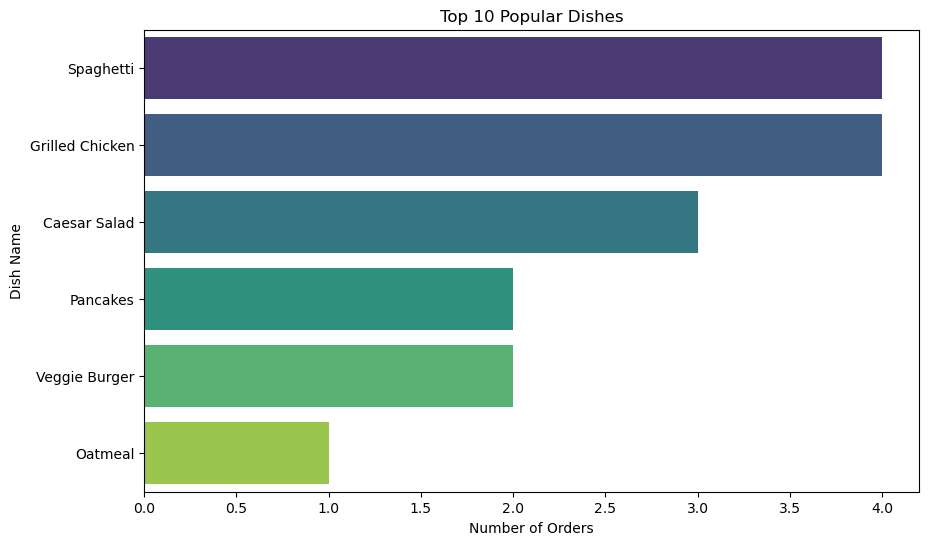

In [8]:
# 1️⃣ Top 10 Popular Dishes

popular_dishes = data['Dish Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x = popular_dishes.values, y = popular_dishes.index, palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.savefig('popular_dishes.png')
plt.show()

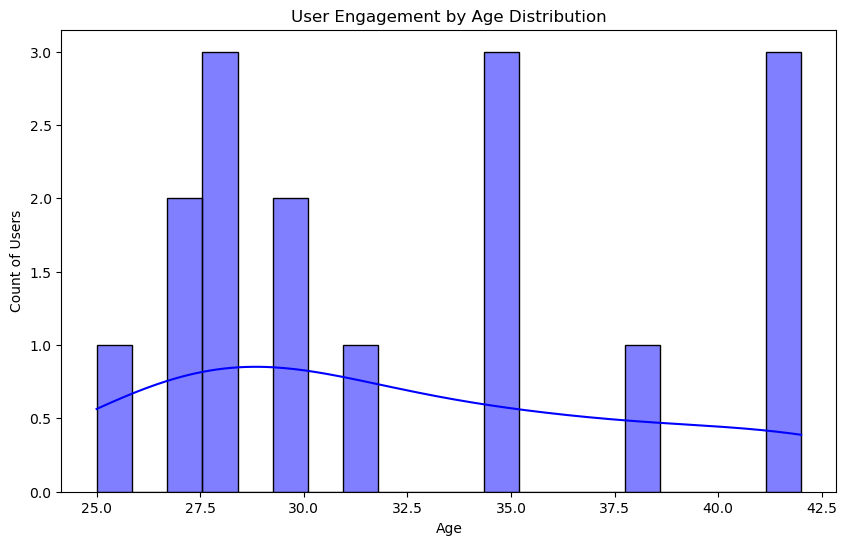

In [9]:
# 2️⃣ User Engagement by Age

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('User Engagement by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.savefig('user_engagement_by_age.png')
plt.show()

In [10]:
data.groupby('User ID')['Order ID'].nunique()

User ID
U001    3
U002    3
U003    3
U004    2
U005    2
U006    1
U007    1
U008    1
Name: Order ID, dtype: int64

In [11]:
data.groupby('User ID')['Session ID'].nunique()

User ID
U001    3
U002    3
U003    3
U004    2
U005    2
U006    1
U007    1
U008    1
Name: Session ID, dtype: int64

In [19]:
sessions_vs_orders = data.groupby('User ID')['Order ID'].nunique() / data.groupby('User ID')['Session ID'].nunique()
sessions_vs_orders

User ID
U001    1.0
U002    1.0
U003    1.0
U004    1.0
U005    1.0
U006    1.0
U007    1.0
U008    1.0
dtype: float64

In [20]:
sessions_vs_orders = sessions_vs_orders.dropna().reset_index(name='Conversion Rate')
sessions_vs_orders

,User ID,Conversion Rate
0,U001,1.0
1,U002,1.0
2,U003,1.0
3,U004,1.0
4,U005,1.0
5,U006,1.0
6,U007,1.0
7,U008,1.0


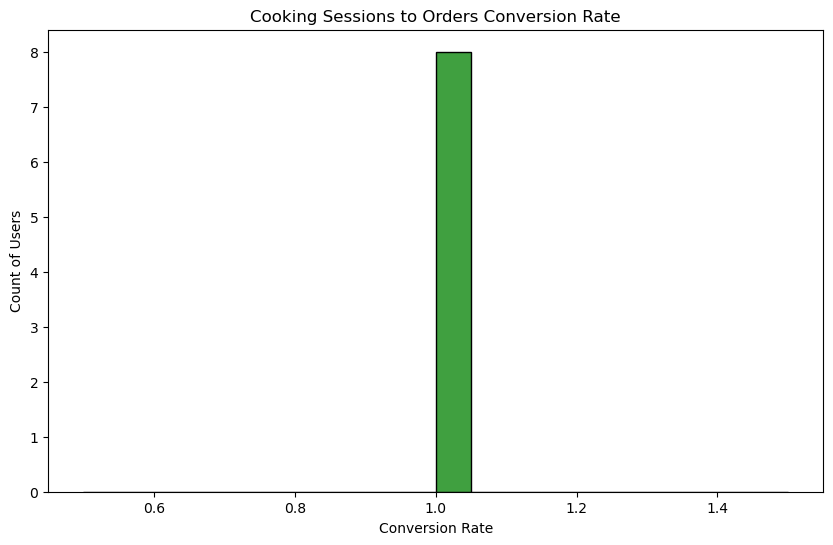

In [21]:
# 3️⃣ Cooking Sessions vs Orders

sessions_vs_orders = data.groupby('User ID')['Order ID'].nunique() / data.groupby('User ID')['Session ID'].nunique()
sessions_vs_orders = sessions_vs_orders.dropna().reset_index(name='Conversion Rate')

plt.figure(figsize=(10, 6))
sns.histplot(sessions_vs_orders['Conversion Rate'], bins=20, color='green')
plt.title('Cooking Sessions to Orders Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Count of Users')
plt.savefig('sessions_vs_orders.png')
plt.show()

In [22]:
revenue_by_meal = data.groupby('Meal Type')['Amount (USD)'].sum().reset_index()
revenue_by_meal

,Meal Type,Amount (USD)
0,Breakfast,23.5
1,Dinner,106.5
2,Lunch,50.0


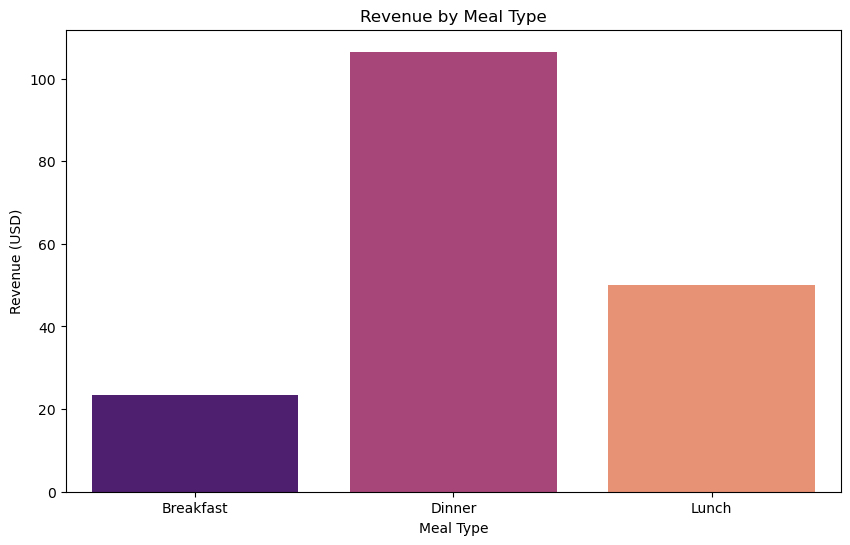

In [24]:
# 4️⃣ Revenue Insights by Meal Type

revenue_by_meal = data.groupby('Meal Type')['Amount (USD)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Meal Type', y='Amount (USD)', data=revenue_by_meal, palette='magma')
plt.title('Revenue by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Revenue (USD)')
plt.savefig('revenue_by_meal.png')
plt.show()

## Step 3: Business Insights

In [25]:
print("1️⃣ Top Dishes: Highlight and promote the most popular dishes to increase sales.")
print("2️⃣ User Segmentation: Target high-engagement age groups with promotions.")
print("3️⃣ Cooking-to-Order Conversion: Offer discounts or incentives to convert users from cooking to ordering.")
print("4️⃣ Revenue Insights: Focus advertising on meal types that generate the highest revenue.")


1️⃣ Top Dishes: Highlight and promote the most popular dishes to increase sales.
2️⃣ User Segmentation: Target high-engagement age groups with promotions.
3️⃣ Cooking-to-Order Conversion: Offer discounts or incentives to convert users from cooking to ordering.
4️⃣ Revenue Insights: Focus advertising on meal types that generate the highest revenue.
